# Introduction & Problem Statement

Problem Statement:
Dream Housing Finance company deals in all home loans. 
They have a presence across all urban, semi-urban, and rural areas. 
Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. 
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. 
To automate this process, they have given a problem to identify the customer's segments, 
those are eligible for loan amount so that they can specifically target these customers.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('test.csv')
df2=pd.read_csv('train.csv')

In [3]:
df=df1._append(df2)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


## Dataset Key Description:

- Loan_ID: Unique Loan ID
- Gender: Male/ Female
- Married: Applicant married (Y/N)
- Dependents:	Number of dependents
- Education: Applicant Education (Graduate/ Under Graduate)
- Self_Employed: Self-employed (Y/N)
- ApplicantIncome: Applicant income
- CoapplicantIncome:	Coapplicant income
- LoanAmount:	Loan amount in thousands
- Loan_Amount_Term: Term of a loan in months
- Credit_History:	credit history meets guidelines
- Property_Area: Urban/ Semi-Urban/ Rural
- Loan_Status: Loan approved (Y/N)

# Data cleaning & Preprocessing

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [7]:
#Finding Null values in the dataset

In [8]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

In [10]:
#Filling Null values with mode of self_employed column.

In [11]:
mode_sf_emp=df['Self_Employed'].mode()

In [12]:
mode_sf_emp

0    No
Name: Self_Employed, dtype: object

In [13]:
df['Self_Employed']=df['Self_Employed'].fillna(method='ffill')

In [14]:
#Filling Null values with mode of Loan_status column.

In [15]:
mode_ln_st=df['Loan_Status'].mode()
mode_ln_st

0    Y
Name: Loan_Status, dtype: object

In [16]:
df['Loan_Status']=df['Loan_Status'].fillna(method='ffill')

In [17]:
#Filling Null values with median of credit_History column.

In [18]:
median_cr=df['Credit_History'].median()
median_cr

1.0

In [19]:
df['Credit_History']=df['Credit_History'].fillna(median_cr)

In [20]:
#Re-checking for the Null values percentages.
df.isnull().sum()/len(df)*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         0.000000
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        0.000000
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

In [21]:
#Dropping the remaining null values from the dataset since their % is low.
df.dropna(inplace=True)

In [22]:
#Final checking for the Null values.
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
#Numerical_col
num_col=df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [24]:
#Categorical_col
cat_col=df.select_dtypes(include=['O']).columns
cat_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
#Dropping the dependent column since it is of no use in my prediction.
df.drop('Dependents',axis=1,inplace=True)

# Exploratory Data Analysis

In [26]:
df.head(10)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


# Finding Maximum Loan Approval Count

<Axes: xlabel='Loan_Status', ylabel='count'>

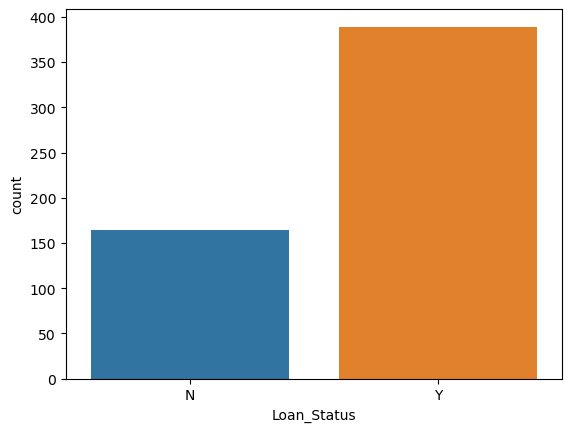

In [27]:
sns.countplot(data=df,x=df['Loan_Status'])

# Loan approval status according to Genders

<Axes: xlabel='Gender', ylabel='count'>

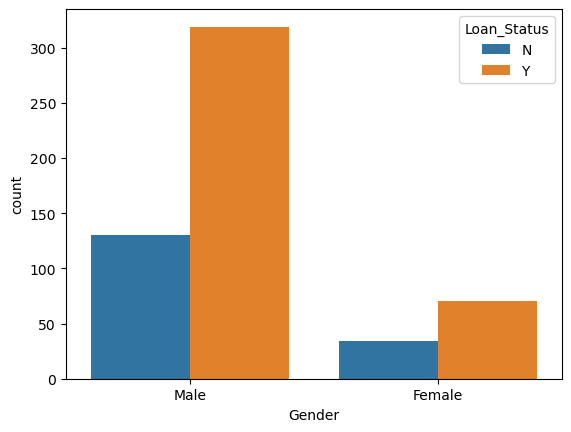

In [28]:
sns.countplot(data=df,x=df['Gender'],hue=df['Loan_Status'])

# Loan Approval count of Self Employed people

<Axes: xlabel='Self_Employed', ylabel='count'>

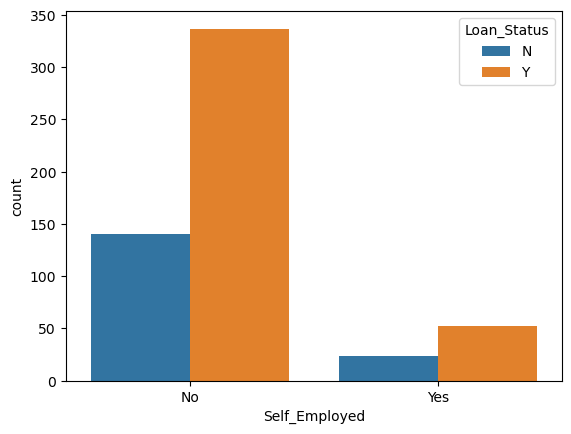

In [29]:
sns.countplot(data=df,x=df['Self_Employed'],hue=df['Loan_Status'])

# Loan Approval count according to Property Area

<Axes: xlabel='Property_Area', ylabel='count'>

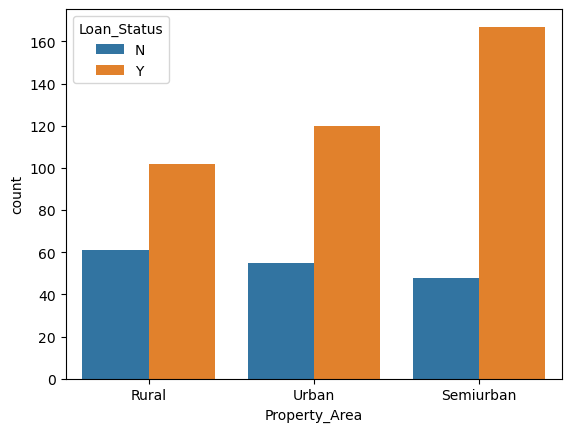

In [30]:
sns.countplot(data=df,x=df['Property_Area'],hue=df['Loan_Status'])

# Relation Between Applicant Income & Loan Amount

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

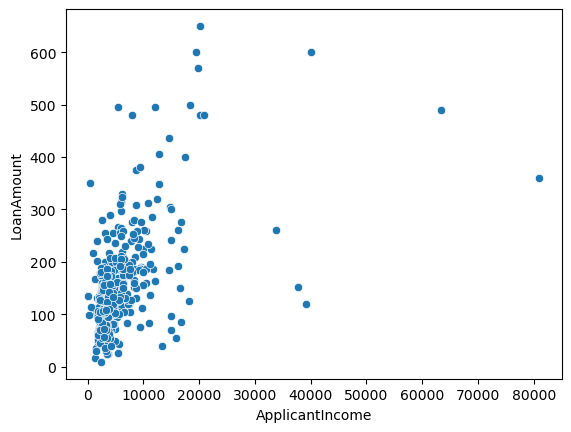

In [31]:
sns.scatterplot(data=df,x=df['ApplicantIncome'],y=df['LoanAmount'])

<Axes: ylabel='Density'>

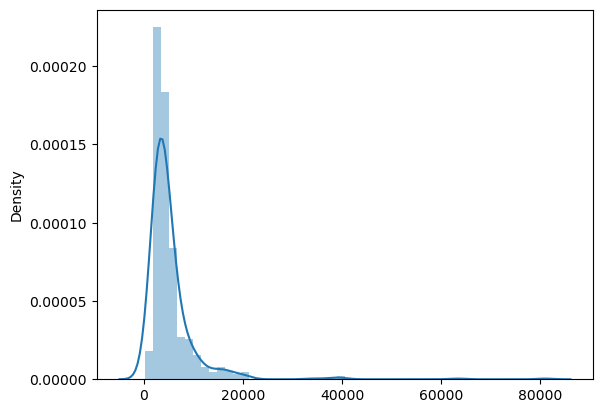

In [32]:
sns.distplot(x=df['ApplicantIncome'])

# Highest Applicant Income according to Property Area

<Axes: xlabel='Property_Area', ylabel='ApplicantIncome'>

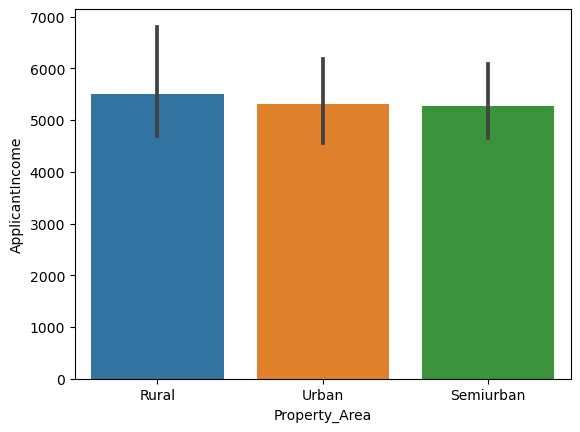

In [33]:
sns.barplot(data=df,x=df['Property_Area'],y=df['ApplicantIncome'])

# Encoding usding LabelEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
cat_col=df.select_dtypes(include='O').columns
cat_col

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
for i in cat_col:
    df[i]=le.fit_transform(df[i])

In [38]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2,1


# Separating the Features (X) & Target (Y) from the dataset

In [39]:
x=df.drop('Loan_Status',axis=1)
x

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2
3,2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2
4,3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,4,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,548,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,549,1,1,0,0,4106,0.0,40.0,180.0,1.0,0
611,550,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,551,1,1,0,0,7583,0.0,187.0,360.0,1.0,2


In [40]:
y=df['Loan_Status']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

# Balancing the Dataset

In [41]:
y.value_counts()

Loan_Status
1    389
0    164
Name: count, dtype: int64

In [42]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

x_resampled, y_resampled=SMOTE().fit_resample(x,y)
x, y=SMOTE().fit_resample(x,y)

In [43]:
y.value_counts().to_frame()

,count
Loan_Status,
0,389
1,389


# Splitting Data into Training & Testing data.

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [45]:
comp=dict()

# Predicting Using KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [47]:
from sklearn.metrics import accuracy_score,classification_report
ac = accuracy_score(ytest,ypred)
print(ac)
print(classification_report(ytest,ypred))

0.6794871794871795
              precision    recall  f1-score   support

           0       0.69      0.74      0.71        84
           1       0.67      0.61      0.64        72

    accuracy                           0.68       156
   macro avg       0.68      0.67      0.68       156
weighted avg       0.68      0.68      0.68       156



### HPT

In [48]:
trainac=[]
testac=[]

for i in range(1,31):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(xtrain,ytrain)
    
    train=kn.score(xtrain,ytrain)
    test=kn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

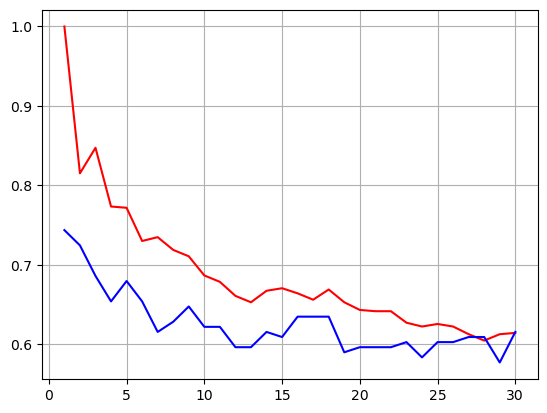

In [49]:
plt.plot(range(1,31),trainac,color="red")
plt.plot(range(1,31),testac,color="blue")
plt.grid()

In [50]:
#Re-building the model using n_neighbors=2

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [51]:
from sklearn.metrics import accuracy_score,classification_report
ac = accuracy_score(ytest,ypred)
print(ac)
print(classification_report(ytest,ypred))

0.7243589743589743
              precision    recall  f1-score   support

           0       0.68      0.92      0.78        84
           1       0.84      0.50      0.63        72

    accuracy                           0.72       156
   macro avg       0.76      0.71      0.70       156
weighted avg       0.75      0.72      0.71       156



In [52]:
knn=knn.score(xtest,ytest)
comp['KNN']=knn

## - Using KNN Classifier we have achieved an Average Accuracy of 72 %.

# Predicting using LogisticRegression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [54]:
def my_model(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))

In [55]:
lr=LogisticRegression()

In [56]:
my_model(lr)

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        84
           1       0.61      0.65      0.63        72

    accuracy                           0.65       156
   macro avg       0.65      0.65      0.65       156
weighted avg       0.65      0.65      0.65       156



- Using Logistic Regression we have achieved an Average Accuracy of 65 % which is not that good. 
- Lets see if we can increase this accuracy by hyper tuning.

### HPT

In [57]:
#Hypertuning using Solver--> Liblinear

logreg = LogisticRegression(solver = "liblinear")
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [58]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.7307692307692307
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        84
           1       0.67      0.81      0.73        72

    accuracy                           0.73       156
   macro avg       0.74      0.74      0.73       156
weighted avg       0.74      0.73      0.73       156



In [59]:
#Hypertuning using Solver--> newton-cg

logreg = LogisticRegression(solver ='newton-cg')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [60]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.7115384615384616
              precision    recall  f1-score   support

           0       0.77      0.65      0.71        84
           1       0.66      0.78      0.71        72

    accuracy                           0.71       156
   macro avg       0.72      0.72      0.71       156
weighted avg       0.72      0.71      0.71       156



In [61]:
logreg=logreg.score(xtest,ytest)
comp['LogisticRegression']=logreg

- Both Hyper Tunners 'liblinear' & 'newton-cg' are giving me an accuracy of 71%

# Predicting using DecisionTreeClassifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt=DecisionTreeClassifier()

In [64]:
my_model(dt)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        84
           1       0.72      0.67      0.69        72

    accuracy                           0.72       156
   macro avg       0.72      0.72      0.72       156
weighted avg       0.72      0.72      0.72       156



In [65]:
dt=dt.score(xtest,ytest)
comp['DT']=dt

- Decision Tree Classifier is giving an accuracy of 72%.

# RandomForestClassifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf=RandomForestClassifier()

In [68]:
my_model(rf)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        84
           1       0.74      0.89      0.81        72

    accuracy                           0.81       156
   macro avg       0.81      0.81      0.81       156
weighted avg       0.82      0.81      0.81       156



In [69]:
rf=rf.score(xtest,ytest)
comp['RandomForest']=rf

- Random Forest Classifier is giving an accuracy of 81%

# AdaBoostClassifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [71]:
adb=AdaBoostClassifier(n_estimators=450)
my_model(adb)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        84
           1       0.71      0.78      0.74        72

    accuracy                           0.75       156
   macro avg       0.75      0.75      0.75       156
weighted avg       0.75      0.75      0.75       156



- ADABoost Classifier is giving an accuracy of 75%

In [72]:
adb=adb.score(xtest,ytest)
comp['ADABoost']=adb

# Gradient Boosting Classifier

In [73]:
gb=GradientBoostingClassifier()
my_model(gb)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82        84
           1       0.76      0.88      0.81        72

    accuracy                           0.81       156
   macro avg       0.82      0.82      0.81       156
weighted avg       0.82      0.81      0.81       156



- Gradient Boost Classifier is giving an accuracy of 81%

In [74]:
gb=gb.score(xtest,ytest)
comp['GradientBoost']=gb

# XGBClassifier

In [75]:
from xgboost import XGBClassifier

In [76]:
xgb=XGBClassifier()
my_model(xgb)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        84
           1       0.79      0.79      0.79        72

    accuracy                           0.81       156
   macro avg       0.81      0.81      0.81       156
weighted avg       0.81      0.81      0.81       156



- XGBoost Classifier is giving an accuracy of 81%

In [77]:
xgb=xgb.score(xtest,ytest)
comp['XGB']=xgb

# Comparing Predictions of all the Classifiers

<BarContainer object of 7 artists>

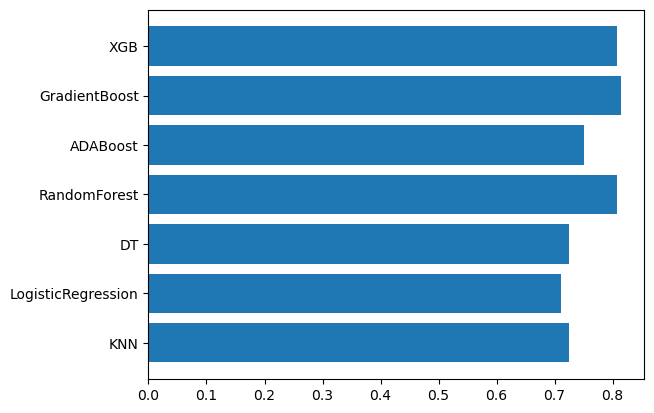

In [78]:
keys = list(comp.keys())
val = list(comp.values())
plt.barh(keys,val)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'LogisticRegression'),
  Text(2, 0, 'DT'),
  Text(3, 0, 'RandomForest'),
  Text(4, 0, 'ADABoost'),
  Text(5, 0, 'GradientBoost'),
  Text(6, 0, 'XGB')])

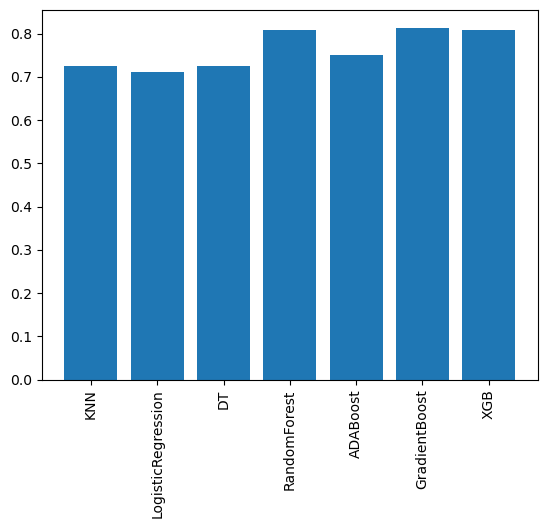

In [79]:
keys = list(comp.keys())
val = list(comp.values())
plt.bar(keys,val)
plt.xticks(rotation=90)

# After comparison between the classifiers , we can see that Gradient Boosting classifier is having the highest accuracy, and which is best for our model. 